In [1]:
import pandas as pd
import numpy as np

In [45]:
weatherNodes = pd.read_csv("weather_based_nodes.csv")

In [46]:
weatherNodes.head(5)

,id,name,type,dTime,energy_power
0,1001,Photovoltaics Tech,photovoltaics,20210501-00:00,11.153245
1,1002,Giant Wind Power,wind_power,20210501-00:00,11.487928
2,1003,City consumption,consumption,20210501-00:00,-18.325034
3,1001,Photovoltaics Tech,photovoltaics,20210501-01:00,13.299615
4,1002,Giant Wind Power,wind_power,20210501-01:00,10.713920


In [47]:
print(weatherNodes['dTime'][48][9:-3])

16


In [48]:
totalEnergyPower = [0] * (14 * 24)
length = weatherNodes.shape[0]
mx = 0
zeroRank = int(weatherNodes['dTime'][0][6:8]) * 24 + int(weatherNodes['dTime'][0][9:-3])
for row in range(0, length) :
    rank = int(weatherNodes['dTime'][row][6:8]) * 24 + int(weatherNodes['dTime'][row][9:-3]) - zeroRank
    totalEnergyPower[rank] = totalEnergyPower[rank] + weatherNodes['energy_power'][row]

In [49]:
import matplotlib.pyplot as plt

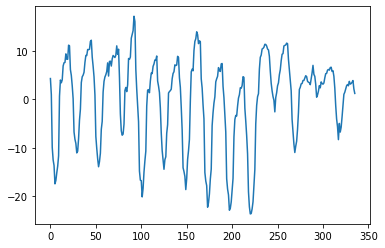

In [50]:
hours = [i for i in range(0, 14*24)]
plt.plot(hours, totalEnergyPower)

In [51]:
def Weibull_reliability_function(x) :
    return pow(2.718281828459,-pow((x - 9.6)/213,4.2))

updTotalEnergyPower = []
for hour in range(0, 14 * 24) :
    updTotalEnergyPower.append(totalEnergyPower[hour] * Weibull_reliability_function(hour))

sumEnergyPower = []
sumEnergyPower.append(updTotalEnergyPower[0])
for hour in range(1, 14 * 24) :
    sumEnergyPower.append(sumEnergyPower[hour - 1] + updTotalEnergyPower[hour])

/root/anaconda3/envs/HW/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


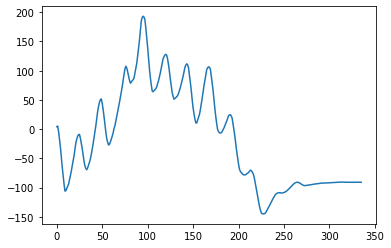

In [52]:
plt.plot(hours, sumEnergyPower)

/root/anaconda3/envs/HW/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


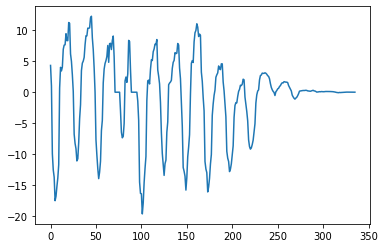

In [53]:
## parameters of Storage system (from files uploaded by clients)
currentStorage = 150
highLimitStorage = 200
lowLimitStorage = 100
## energyChange of Storage system
storageEnergyChange = []
tempStorage = currentStorage
for hour in range(0, 14 * 24) :
    energyChange = updTotalEnergyPower[hour]
    if energyChange > highLimitStorage - tempStorage :
        energyChange = highLimitStorage - tempStorage
    storageEnergyChange.append(float(energyChange))
    tempStorage = tempStorage + energyChange
plt.plot(hours, storageEnergyChange)

In [61]:
tempStorage = currentStorage
maxNeedFossilFuelPower = 0
for hour in range(0, 14 * 24) :
    tempStorage = tempStorage + updTotalEnergyPower[hour]
    if tempStorage > highLimitStorage :
        tempStorage = highLimitStorage
    if tempStorage < lowLimitStorage :
        fossilFuelPower = (lowLimitStorage - tempStorage) / hour
        if fossilFuelPower >= maxNeedFossilFuelPower :
            maxNeedFossilFuelPower = fossilFuelPower
fossilFuelPowerNeed = [float(maxNeedFossilFuelPower)] * (14 * 24)

/root/anaconda3/envs/HW/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


In [62]:
dTime = []
index = []
energy_power = []
firstDay = int(weatherNodes['dTime'][0][0:8])
firstHour = int(weatherNodes['dTime'][0][9:-3])
for day in range(0, 14) : 
    for hour in range(0, 24) :
        nowDay = firstDay + day
        nowHour = firstHour + hour
        for i in range(1, 6) :
            if nowHour >= 10 : 
                dTime.append("{}-{}:00".format(nowDay, nowHour))
            else :
                dTime.append("{}-0{}:00".format(nowDay, nowHour))
            if i <= 3 :
                index.append(1000 + i)
                energy_power.append(weatherNodes['energy_power'][3 * (day * 24 + hour) + i - 1])
            elif i == 4 :
                index.append(2000 + i - 4)
                energy_power.append(storageEnergyChange[day * 24 + hour])
            else :
                index.append(2000 + i - 4)
                energy_power.append(fossilFuelPowerNeed[day * 24 + hour])

In [63]:
df5 = pd.DataFrame(columns = ['dTime', 'id', 'energy_power'])

In [64]:
df5['dTime'] = dTime
df5['id'] = index
df5['energy_power'] = energy_power

In [65]:
df5.head(1340)

,dTime,id,energy_power
0,20210501-00:00,1001,11.153245
1,20210501-00:00,1002,11.487928
2,20210501-00:00,1003,-18.325034
3,20210501-00:00,2000,4.316131
4,20210501-00:00,2001,6.208521
...,...,...,...
1335,20210512-03:00,1001,15.954198
1336,20210512-03:00,1002,9.147576
1337,20210512-03:00,1003,-31.905391
1338,20210512-03:00,2000,-0.742685


In [66]:
df5.to_csv("Schedule.csv", index = False)

In [67]:
dTime = []
index = []
names = []
types = []
energy_power = []
for day in range(0, 14) :
    for hour in range(0, 24) :
        nowDay = firstDay + day
        nowHour = firstHour + hour
        for i in range(1, 3) :
            if nowHour >= 10 : 
                dTime.append("{}-{}:00".format(nowDay, nowHour))
            else :
                dTime.append("{}-0{}:00".format(nowDay, nowHour))
            index.append(2000 + i)
            if i == 1 :
                types.append("storage")
                names.append("Intelligent Storage System")
                energy_power.append(storageEnergyChange[day * 24 + hour])
            else :
                types.append("fossil_fuel")
                names.append("Clean Fuel Home")
                energy_power.append(fossilFuelPowerNeed[day * 24 + hour])

In [68]:
df6 = pd.DataFrame(columns = ['id', 'name', 'type', 'dTime', 'energy_power'])

In [69]:
df6['id'] = index
df6['name'] = names
df6['type'] = types
df6['dTime'] = dTime
df6['energy_power'] = energy_power

In [70]:
df6.head(10)

,id,name,type,dTime,energy_power
0,2001,Intelligent Storage System,storage,20210501-00:00,4.316131
1,2002,Clean Fuel Home,fossil_fuel,20210501-00:00,6.208521
2,2001,Intelligent Storage System,storage,20210501-01:00,1.003351
3,2002,Clean Fuel Home,fossil_fuel,20210501-01:00,6.208521
4,2001,Intelligent Storage System,storage,20210501-02:00,-9.928131
5,2002,Clean Fuel Home,fossil_fuel,20210501-02:00,6.208521
6,2001,Intelligent Storage System,storage,20210501-03:00,-12.544502
7,2002,Clean Fuel Home,fossil_fuel,20210501-03:00,6.208521
8,2001,Intelligent Storage System,storage,20210501-04:00,-13.704266
9,2002,Clean Fuel Home,fossil_fuel,20210501-04:00,6.208521


In [75]:
df6.to_csv("Controlled_Nodes.csv", index = False)